In [36]:
#Blast Analytics
#This is a KNN modeling effort using a subset of the Tableau World Indivators data set 

In [52]:
import pandas as pd
#READ DATA
dfr = pd.read_csv('data/regions.csv')
df = dfr.dropna()
df.head()

,Region,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Lending Interest,Life Expectancy Female,Life Expectancy Male,Population Total
0,Africa,0.020,87931.0,26998.0,5.479006e+10,60.0,0.100,71.0,67.0,31719449
1,Africa,0.050,9542.0,7499.0,9.129595e+09,22.0,1.032,47.0,44.0,13924930
3,Africa,0.027,4276.0,1836.0,5.788312e+09,152.0,0.155,52.0,49.0,1755375
6,Africa,0.041,3432.0,6310.0,9.287368e+09,26.0,0.220,53.0,51.0,15927713
11,Africa,0.039,1049.0,814.0,3.219911e+09,22.0,0.220,53.0,51.0,3126204


In [53]:
df.isnull().values.any()

False

In [54]:
df['Region'].unique()

array(['Africa', 'Asia', 'Europe', 'Middle East', 'Oceania',
       'The Americas'], dtype=object)

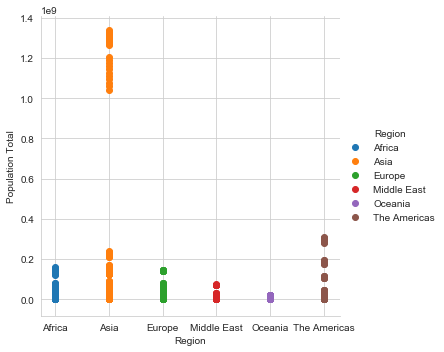

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
#EDA - individual scatter
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='Region', height=5) \
.map(plt.scatter, "Region", "Population Total") \
.add_legend();

In [56]:
#EDA - other plots
#.map(plt.scatter, "Region", "Birth Rate") \
#.map(plt.scatter, "Region", "CO2 Emissions") \
#.map(plt.scatter, "Region", "Energy Usage") \
#.map(plt.scatter, "Region", "GDP") \
#.map(plt.scatter, "Region", "Health Exp/Capita") \
#.map(plt.scatter, "Region", "Lending Interest") \
#.map(plt.scatter, "Region", "Life Expectancy Female") \
#.map(plt.scatter, "Region", "Life Expectancy Male") \
#.map(plt.scatter, "Region", "Population Total") \

In [57]:
from sklearn import preprocessing
#NORMALIZATION
x_data = df.drop(['Region'],axis=1)
y_data = df['Region']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Birth Rate','CO2 Emissions','Energy Usage','GDP','Health Exp/Capita',\
                                               'Lending Interest','Life Expectancy Female','Life Expectancy Male',\
                                               'Population Total'])
data.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Lending Interest,Life Expectancy Female,Life Expectancy Male,Population Total
0,0.285714,0.010610,0.010720,0.003655,0.006380,0.080577,0.659091,0.543478,0.023652
1,1.000000,0.001151,0.002972,0.000603,0.001972,0.871077,0.113636,0.043478,0.010349
2,0.452381,0.000515,0.000722,0.000380,0.017051,0.127226,0.227273,0.152174,0.001251
3,0.785714,0.000413,0.002500,0.000613,0.002436,0.182358,0.250000,0.195652,0.011846
4,0.738095,0.000126,0.000316,0.000208,0.001972,0.182358,0.250000,0.195652,0.002276


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#TRAIN
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) 

#MODEL PARAMETERS
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#RESULTS
print("Matrix 1 - Training/Testing")
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Matrix 1 - Training/Testing
Confusion Matrix:
[[40  1  0  1  0  0]
 [ 0 38  3  3  0  3]
 [ 0  4 56  0  0  1]
 [ 0  0  1 15  0  1]
 [ 0  0  0  0  9  0]
 [ 1  1  3  1  0 59]]
Classification Report:
              precision    recall  f1-score   support

      Africa       0.98      0.95      0.96        42
        Asia       0.86      0.81      0.84        47
      Europe       0.89      0.92      0.90        61
 Middle East       0.75      0.88      0.81        17
     Oceania       1.00      1.00      1.00         9
The Americas       0.92      0.91      0.91        65

    accuracy                           0.90       241
   macro avg       0.90      0.91      0.90       241
weighted avg       0.90      0.90      0.90       241

Accuracy: 0.9004149377593361


In [60]:
#READ UNKNOWN DATA
dfr = pd.read_csv('data/unknown.csv')
dfu = dfr.dropna()
dfu.head()

,Region,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Lending Interest,Life Expectancy Female,Life Expectancy Male,Population Total
0,Unknown,0.009,53469,24695,12736856485,64,0.677,75,63,10005000


In [61]:
#PREPEND UNKNOWN DATA TO THE ORIGINAL DATA
dfp = dfu.append(df, ignore_index=True)
dfp.head()

,Region,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Lending Interest,Life Expectancy Female,Life Expectancy Male,Population Total
0,Unknown,0.009,53469.0,24695.0,1.273686e+10,64.0,0.677,75.0,63.0,10005000
1,Africa,0.020,87931.0,26998.0,5.479006e+10,60.0,0.100,71.0,67.0,31719449
2,Africa,0.050,9542.0,7499.0,9.129595e+09,22.0,1.032,47.0,44.0,13924930
3,Africa,0.027,4276.0,1836.0,5.788312e+09,152.0,0.155,52.0,49.0,1755375
4,Africa,0.041,3432.0,6310.0,9.287368e+09,26.0,0.220,53.0,51.0,15927713


In [62]:
#NORMALIZATION
x_data = dfp.drop(['Region'],axis=1)
y_data = dfp['Region']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data2 = pd.DataFrame(X_data_minmax,columns=['Birth Rate','CO2 Emissions','Energy Usage','GDP','Health Exp/Capita',\
                                                'Lending Interest','Life Expectancy Female','Life Expectancy Male',\
                                                'Population Total'])

In [63]:
#CREATE NEW SINGLE ENTRY
data3 = pd.DataFrame(columns=['Birth Rate','CO2 Emissions','Energy Usage','GDP','Health Exp/Capita','Lending Interest','Life Expectancy Female','Life Expectancy Male','Population Total'])
data3.loc[0] = data2.iloc[0]
data3.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Lending Interest,Life Expectancy Female,Life Expectancy Male,Population Total
0,0.02381,0.006451,0.009805,0.000844,0.006844,0.569975,0.75,0.456522,0.007419


In [64]:
#PREDICTIONS
zpred=knn_clf.predict(data3)
print("The predicted region is:")
print(zpred)

The predicted region is:
['Europe']


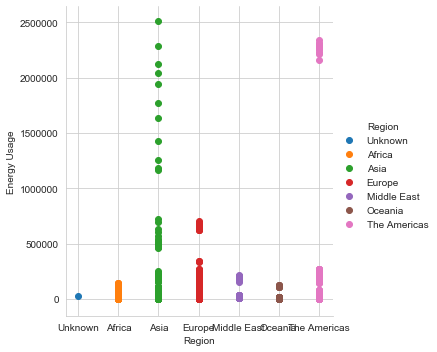

In [65]:
#VISUALIZE THE CLASSIFIERS
sns.set_style("whitegrid");
sns.FacetGrid(dfp, hue='Region', height=5) \
.map(plt.scatter, "Region", "Energy Usage") \
.add_legend();

In [66]:
#POST EDA - OTHER CLASSIFIERS TO VISUALIZE
#.map(plt.scatter, "Region", "GDP") \
#.map(plt.scatter, "Region", "Birth Rate") \
#.map(plt.scatter, "Region", "CO2 Emissions") \
#.map(plt.scatter, "Region", "Health Exp/Capita") \
#.map(plt.scatter, "Region", "Lending Interest") \
#.map(plt.scatter, "Region", "Life Expectancy Female") \
#.map(plt.scatter, "Region", "Life Expectancy Male") \
#.map(plt.scatter, "Region", "Population Total") \